In [1]:
from numpy import *
import math
import matplotlib.pyplot as plt

In [2]:
def beta(thickness, wave_length, N0, N1, theta0):
    return ((2*pi*thickness)/wave_length)*((N1**2) - (N0**2)*sin(theta0)**2)*(1/2)

In [3]:
def N(n,k):
    return n - 1j*k

def costhetat(Ni, Nt, thetai):
    #return math.asin((real(Ni)*sin(thetai)/real(Nt))) 
    sinthetat = Ni*sin(thetai)/Nt
    return (1 - sinthetat**2)**(1/2)
    #return arcsin((Ni*sin(thetai))/Nt)
    #return arctan(Nt/Ni)

In [4]:
def rp(Ni, Nt, thetai):
    Nti = Nt/Ni
    nominator = ((Nti**2)*cos(thetai)-((Nti**2)-sin(thetai)**2)**(1/2))
    denominator = ((Nti**2)*cos(thetai)+((Nti**2)-sin(thetai)**2)**(1/2))

    return nominator/denominator

def rs(Ni, Nt, thetai):
    Nti = Nt/Ni
    nominator = (cos(thetai)-((Nti**2)-sin(thetai)**2))**(1/2)
    denominator = (cos(thetai)+((Nti**2)-sin(thetai)**2))**(1/2)
    
    return nominator/denominator

def rjkp(Ni, Nt, thetai):
    thetai = thetai*pi/180
    nominatior = (Nt*cos(thetai) - Ni*costhetat(Ni, Nt, thetai))
    denominator = (Nt*cos(thetai) + Ni*costhetat(Ni, Nt, thetai))

    return nominatior/denominator

def rjks(Ni, Nt, thetai):
    thetai = thetai*pi/180
    nominatior = (Ni*cos(thetai) - Nt*costhetat(Ni, Nt, thetai))
    denominator = (Ni*cos(thetai) + Nt*costhetat(Ni, Nt, thetai))

    return nominatior/denominator

def rjklp(rjkp, rklp, beta):
    nominator = (rjkp + rklp*exp(-2j*beta))
    denominator = (1 + rjkp*rklp*exp(-2j*beta))

    return nominator/denominator

def rjkls(rjks, rkls, beta):
    nominator = (rjks + rkls*exp(-2j*beta))
    denominator = (1 + rjks*rkls*exp(-2j*beta))

    return nominator/denominator

In [5]:
def Rp(rp):
    return abs(rp)**2

def Rs(rs):
    return abs(rs)**2

def Rn(Rp, Rs):
    return (Rp + Rs)/2

In [6]:
def psi(rp, rs):
    return math.atan(abs(rp)/abs(rs))

def delta(rp, rs, psi):
    return (log(rp/(rs*tan(psi))))/1j

In [7]:
#Si = (3.9720, 0.030082)
Si = (3.8827, 0.019626)
Ti = (2.7039, 3.7651)
Air = (1.00027715, 0)
SiO2 = (1.4585, 0)

NSi = N(Si[0], Si[1])
NAir = N(Air[0], Air[1])
NSiO2 = N(SiO2[0], SiO2[1])

wave_length = 0.6328
thetai = 70
#thetatSiO2 = thetat(NAir, NSiO2, thetai)
#thetat = 
thickness = 1

In [8]:
#p = rp/rs = tan(psi)exp(idelta)

Rp: 0.02419065501086962
Rs: 0.694718588822945
Rn: 0.3594546219169073


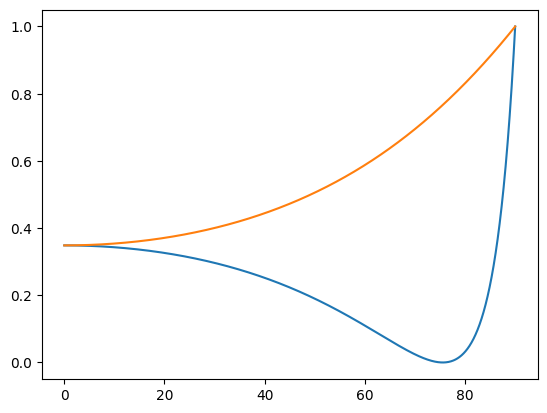

In [9]:
NSi = N(Si[0], Si[1])
theta0 = thetai
#costhetaTi = costhetat(NAir, NTi, theta0)
#thetaTiAngle = arctan(imag(thetaTi)/real(thetaTi))
#thetaTiAngle = 

rTip = rjkp(NAir, NSi, theta0)
rTis = rjks(NAir, NSi, theta0)

RTip = Rp(rTip)
RTis = Rs(rTis)

RTin = Rn(RTip, RTis)

print(f'Rp: {RTip}')
print(f'Rs: {RTis}')
print(f'Rn: {RTin}')

x = linspace(0, 90, num=900)
yp = [Rp(rjkp(NAir, NSi, angle0)) for angle0 in x]
ys = [Rs(rjks(NAir, NSi, angle0)) for angle0 in x]
yn = [Rn(Rp(rjkp(NAir, NSi, angle0)), Rs(rjks(NAir, NSi, angle0))) for angle0 in x]

#print(costhetaTi)

#print(thetaTiAngle)

plt.plot(x, yp)
plt.plot(x, ys)
#plt.plot(x, yn)
plt.show()